# Simple exploratory analysis
This can be used as template for more complicated analysis.

In [5]:
import numpy as np
import pandas as pd
import os

In [3]:
DATA_DIR = "/u/project/sgss/UKBB/PRS-RESEARCH/DATA"

# TODO: wrap below as a function

In [9]:
df_covar = pd.read_csv(os.path.join(DATA_DIR, "REAL-PHENO", "all.covar"), sep='\t')
# use [FID]_[IID] as index
df_covar.index = df_covar.FID.astype(str) + "_" + df_covar.IID.astype(str)
df_covar = df_covar.drop(columns=["FID", "IID"])

In [12]:
trait = "height"

In [10]:
df_covar = df_covar.drop(columns=["FID", "IID"])

In [19]:
df_pheno = pd.read_csv(os.path.join(DATA_DIR, "REAL-PHENO", f"{trait}.raw.pheno"), sep='\t')
df_pheno.index = df_pheno.FID.astype(str) + "_" + df_pheno.IID.astype(str)
df_pheno = df_pheno.drop(columns=["FID", "IID"]).rename(columns={"PHENO": trait})
df_pheno = pd.merge(df_pheno, df_covar, left_index=True, right_index=True)

In [53]:
df_prs = pd.read_csv(f"out/PREDICTION/{trait}.tsv.gz", sep='\t', index_col=0)
df_prs = pd.merge(df_prs, df_pheno, left_index=True, right_index=True).dropna()

In [50]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [56]:
pearsonr(df_prs.MEAN, df_prs["height"])[0] ** 2

0.20394619294600524

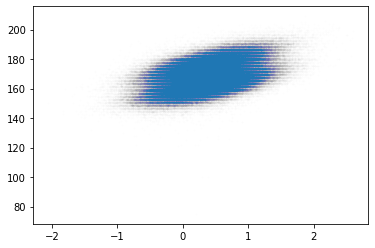

In [49]:
plt.scatter(df_prs.MEAN, df_prs["height"], alpha=0.002, s=2)